In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
%matplotlib inline 

In [24]:
boston_dataset = load_boston()

In [25]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston_dataset.target
boston['MEDV']= boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [26]:
from sklearn import preprocessing
# Get column names first
names = boston.columns
# Create the Scaler object
norm = preprocessing.Normalizer()
# Fit your data on the scaler object
boston = norm.fit_transform(boston)
boston = pd.DataFrame(boston, columns=names)

In [27]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000013,0.035955,0.004614,0.0,0.001075,0.013134,0.130238,0.008170,0.001998,0.591265,0.030562,0.792814,0.009948,0.047940
1,0.000058,0.000000,0.014961,0.0,0.000992,0.013588,0.166966,0.010511,0.004232,0.512112,0.037668,0.839907,0.019342,0.045709
2,0.000058,0.000000,0.015133,0.0,0.001004,0.015379,0.130778,0.010632,0.004281,0.517974,0.038099,0.840809,0.008626,0.074272
3,0.000071,0.000000,0.004772,0.0,0.001003,0.015319,0.100257,0.013270,0.006567,0.485964,0.040935,0.863856,0.006436,0.073114
4,0.000150,0.000000,0.004740,0.0,0.000996,0.015539,0.117842,0.013181,0.006523,0.482675,0.040658,0.862945,0.011589,0.078707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000129,0.000000,0.024652,0.0,0.001184,0.013624,0.142789,0.005122,0.002066,0.564130,0.043395,0.810012,0.019982,0.046288
502,0.000093,0.000000,0.024399,0.0,0.001172,0.012517,0.156866,0.004678,0.002045,0.558335,0.042949,0.811733,0.018570,0.042131
503,0.000124,0.000000,0.024272,0.0,0.001166,0.014193,0.185144,0.004410,0.002035,0.555433,0.042726,0.807514,0.011475,0.048626
504,0.000224,0.000000,0.024430,0.0,0.001173,0.013913,0.182867,0.004892,0.002048,0.559045,0.043003,0.805701,0.013270,0.045051


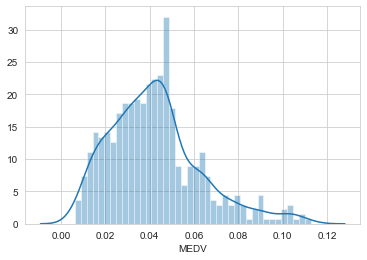

In [28]:
sns.set_style('whitegrid')
sns.distplot(boston['MEDV'],bins=40,kde=True)

In [29]:
X=boston[['RM','LSTAT']]
Y=boston['MEDV']

## Train- Test Split

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,random_state=100)

## Training and Evaluating the model

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

norm_model = LinearRegression()
norm_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
y_train_predict = norm_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print("\n")

# model evaluation for testing set
y_test_predict = norm_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))

The model performance for training set
--------------------------------------
RMSE is 0.009303699994211288


The model performance for testing set
--------------------------------------
RMSE is 0.009164541202330663


In [33]:
norm_model.score(X_test,Y_test)

0.815803767530465